In [1]:
import requests
import json
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import matplotlib

In [2]:
datesraw = pd.date_range(date(2018,1,1), date.today(), freq="W-SAT")
dates= []
for i in datesraw:
    dates.append(i.strftime("%y%m%d"))

In [3]:
def create_url(date):
        base_url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
        ext = ".txt"
        url = base_url + date + ext
        return url
urls = []
for i in dates:
    urls.append(create_url(i))
#print(urls)


def get_data(urls):
    alldata = pd.DataFrame()
    #frames = []
    for i in range(0, len(urls)):
        df = pd.read_csv(urls[i])
        alldata = alldata.append(df)

    alldata = alldata.reset_index(drop=True)
    alldata.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)
    return alldata

In [14]:
alldata = get_data(urls)
#alldata[:15]

KeyboardInterrupt: 

In [5]:
alldata.to_csv('thisyear.csv', index = False)

In [93]:
thisyear = pd.read_csv('thisyear.csv', parse_dates = [[6,7]])
#thisyear = pd.read_csv('thisyear.csv')

In [94]:
col = list(thisyear)
thisyear = thisyear[['C/A', 'UNIT', 'SCP', 'STATION','LINENAME', 'DIVISION', 'DATE_TIME', 'DESC','ENTRIES','EXITS']]

In [33]:
thisyear.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE_TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30 03:00:00,REGULAR,6463109,2187558
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30 07:00:00,REGULAR,6463119,2187567
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30 11:00:00,REGULAR,6463178,2187654
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30 15:00:00,REGULAR,6463373,2187736
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-30 19:00:00,REGULAR,6463712,2187803


In [95]:
thisyear_grouped = thisyear.groupby(['STATION','LINENAME', 'DIVISION','DATE_TIME'])[['ENTRIES','EXITS' ]].agg('sum')

In [98]:
thisyear_grouped.reset_index(inplace=True)

In [132]:
ty_grouped = thisyear_grouped

In [134]:
ty_grouped['timedif'] = ty_grouped.DATE_TIME.diff().dt.seconds/(60**2)

In [135]:
ty_grouped.head()

,STATION,LINENAME,DIVISION,DATE_TIME,ENTRIES,EXITS,timedif
0,1 AV,L,BMT,2017-12-30 03:00:00,3042920597,1642513024,nan
1,1 AV,L,BMT,2017-12-30 07:00:00,3042920881,1642513479,4
2,1 AV,L,BMT,2017-12-30 11:00:00,3042922321,1642515326,4
3,1 AV,L,BMT,2017-12-30 15:00:00,3042925518,1642518757,4
4,1 AV,L,BMT,2017-12-30 19:00:00,3042929343,1642523469,4


In [136]:
ty_grouped = ty_grouped[ty_grouped['timedif']==4]
#filtering to only include observations where the timedifference was 4 hours

In [137]:
ty_grouped['ent'] = ty_grouped.groupby(['STATION', 'LINENAME'])['ENTRIES'].transform(lambda x: x.diff())
pd.options.display.float_format = '{:.0f}'.format

C:\Users\acarlson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
ty_grouped.reset_index(drop = True,inplace=True)
ty_grouped[30:39]

,STATION,LINENAME,DIVISION,DATE_TIME,ENTRIES,EXITS,timedif,ent
30,1 AV,L,BMT,2018-01-04 07:00:00,3042997697,1642601709,4,407
31,1 AV,L,BMT,2018-01-04 11:00:00,3043001524,1642605279,4,3827
32,1 AV,L,BMT,2018-01-04 19:00:00,3043007436,1642611903,4,5912
33,1 AV,L,BMT,2018-01-04 23:00:00,3043009300,1642614042,4,1864
34,1 AV,L,BMT,2018-01-05 03:00:00,3043009917,1642614500,4,617
35,1 AV,L,BMT,2018-01-05 07:00:00,3043010328,1642615445,4,411
36,1 AV,L,BMT,2018-01-05 11:00:00,3043015228,1642621371,4,4900
37,1 AV,L,BMT,2018-01-05 15:00:00,3043018777,1642625058,4,3549
38,1 AV,L,BMT,2018-01-05 19:00:00,3043024923,1642631488,4,6146


In [120]:
#ty_grouped.loc[~(ty_grouped['ent']>0)]
#this locates the entries less than 0

In [139]:
ty_grouped.loc[~(ty_grouped['ent']>0), 'ent']=np.nan
ty_grouped.reset_index(drop=True,inplace=True)
#this turns any entries that are less than 0 to nan

C:\Users\acarlson\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259135032B0>]],
      dtype=object)

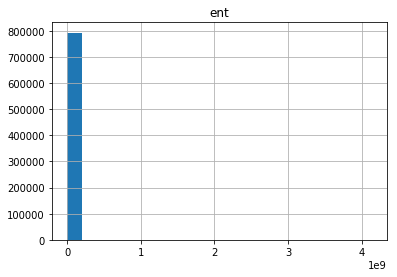

In [143]:
ty_grouped.hist(column='ent', bins=20)
#updated_data.reset_index()
#updated_data['ent'].value_counts()

In [142]:
ty_grouped[:15]

,STATION,LINENAME,DIVISION,DATE_TIME,ENTRIES,EXITS,timedif,ent
0,1 AV,L,BMT,2017-12-30 07:00:00,3042920881,1642513479,4,nan
1,1 AV,L,BMT,2017-12-30 11:00:00,3042922321,1642515326,4,1440
2,1 AV,L,BMT,2017-12-30 15:00:00,3042925518,1642518757,4,3197
3,1 AV,L,BMT,2017-12-30 19:00:00,3042929343,1642523469,4,3825
4,1 AV,L,BMT,2017-12-30 23:00:00,3042932464,1642527315,4,3121
5,1 AV,L,BMT,2017-12-31 03:00:00,3042933955,1642528465,4,1491
6,1 AV,L,BMT,2017-12-31 07:00:00,3042934225,1642528809,4,270
7,1 AV,L,BMT,2017-12-31 11:00:00,3042935343,1642530308,4,1118
8,1 AV,L,BMT,2017-12-31 15:00:00,3042938228,1642533496,4,2885
9,1 AV,L,BMT,2017-12-31 19:00:00,3042941642,1642538396,4,3414


In [ ]:
# Seaborn
# Maybe pull location date
# basemap 

In [ ]:
#use median and 2 or 3 sds from the median to remove high outlier
#create a lambda to check if the following observation is 4 hours later, and if not, remove that observation
#https://seaborn.pydata.org/examples/index.html

